In [41]:
import pandas as pd
import numpy as np
election = pd.read_csv("https://drive.google.com/uc?export=download&id=1fq9qDqXLiUm0un_saxAUpPsSJa05F_bV")
county = pd.read_csv("https://drive.google.com/uc?export=download&id=1LciKFXkb3MmpXFEHDk1Db8YFsK0liF3a")

In [2]:
data = election.merge(county,left_on='FIPS',right_on='fips')

In [42]:
data=election[election['county_name']!='Alaska'].merge(county,left_on='FIPS',right_on='fips',how='left')
data_ak=election[election['county_name']=='Alaska'].drop_duplicates(['votes_dem_2016','votes_gop_2016'])
data_ak['FIPS']=2000
data_ak=data_ak.merge(county,left_on='FIPS',right_on='fips',how='left')
data=pd.concat((data,data_ak),axis=0).sort_values('fips')
data['target']=(data['votes_dem_2016']>data['votes_gop_2016'])*1

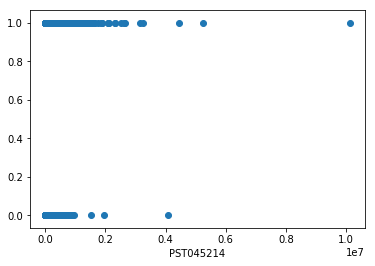

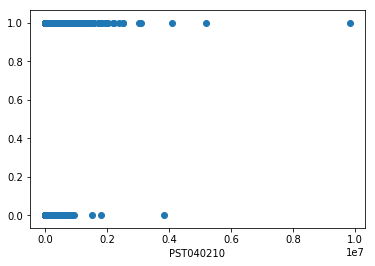

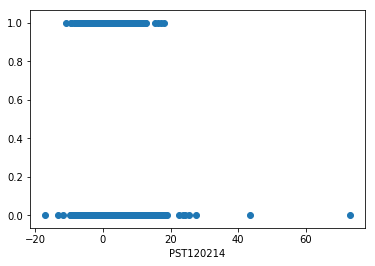

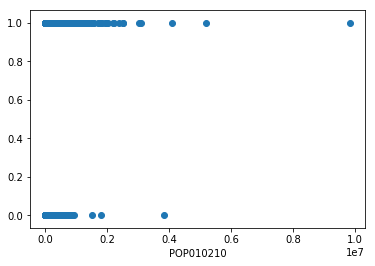

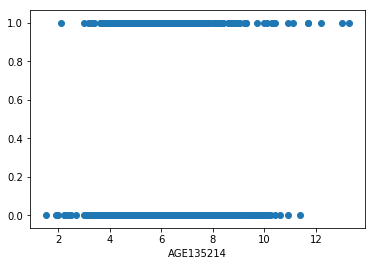

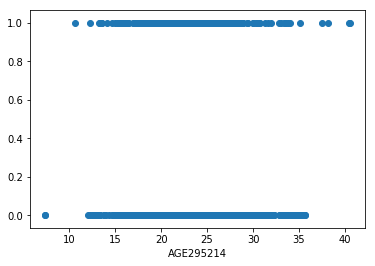

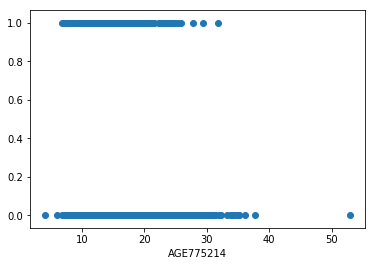

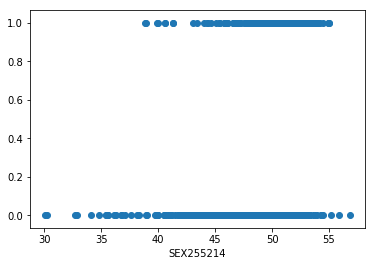

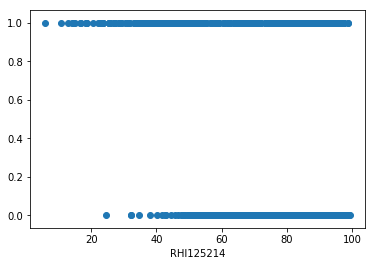

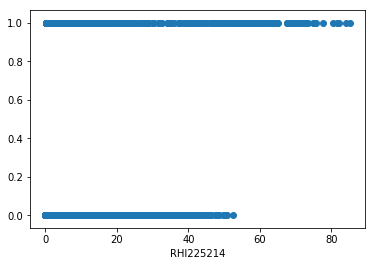

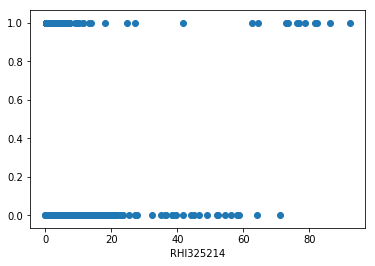

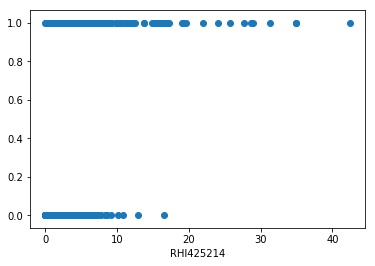

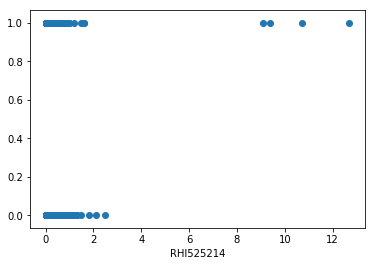

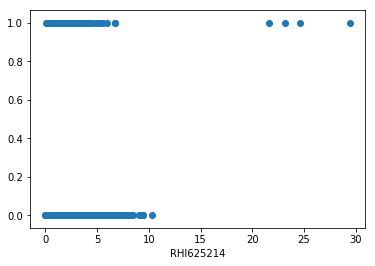

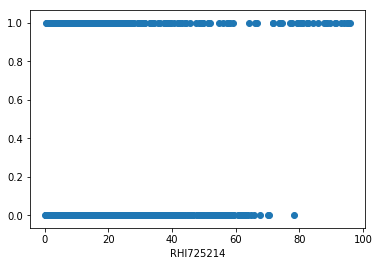

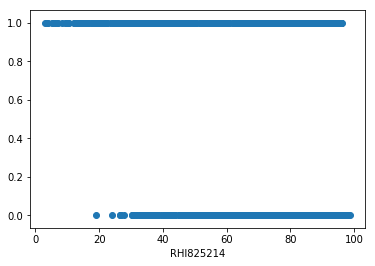

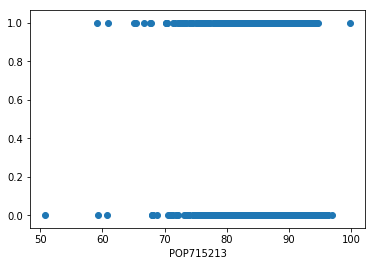

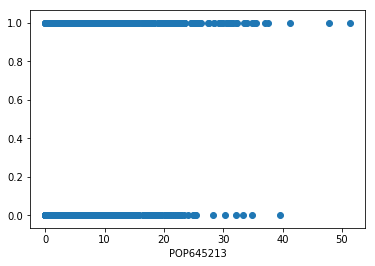

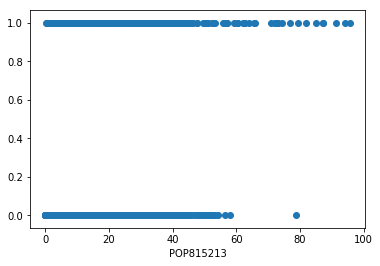

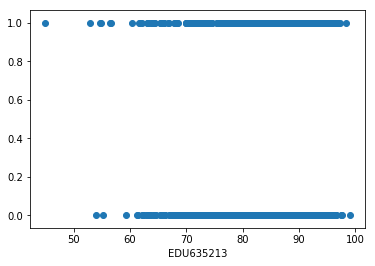

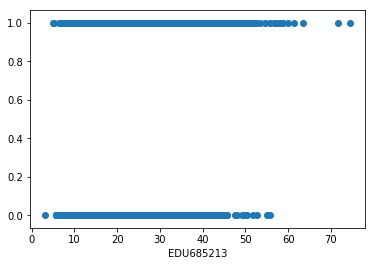

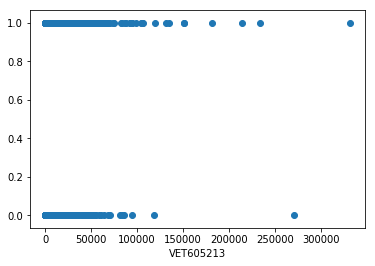

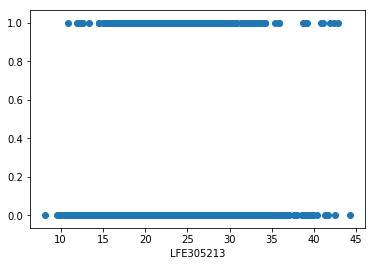

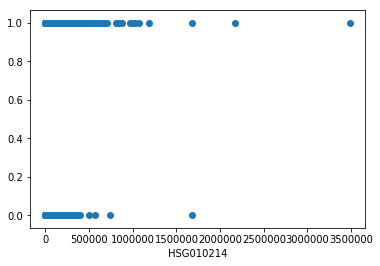

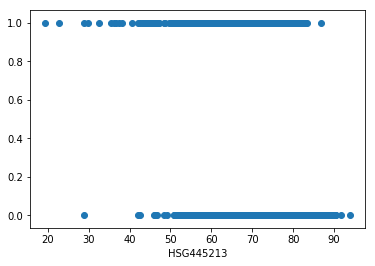

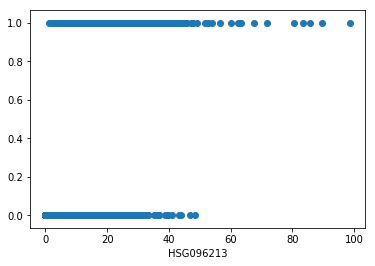

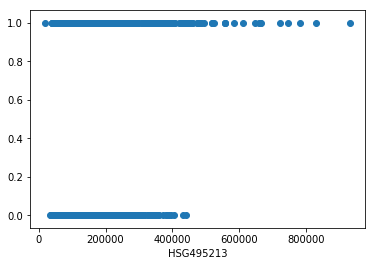

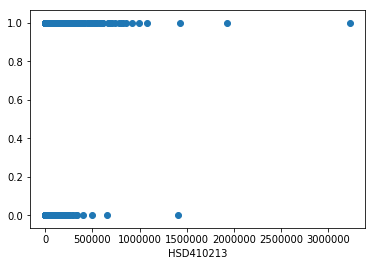

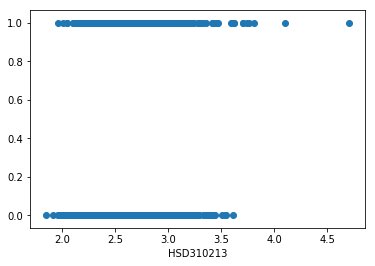

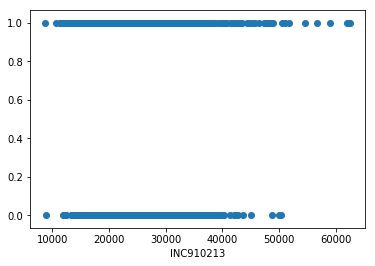

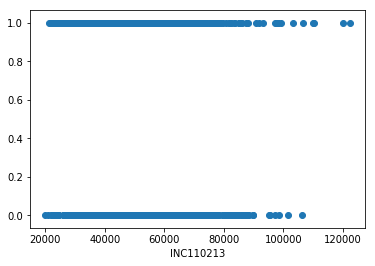

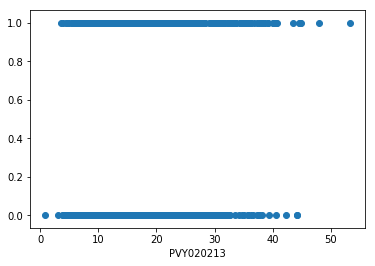

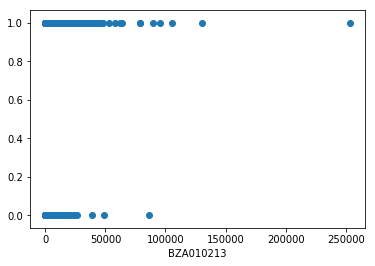

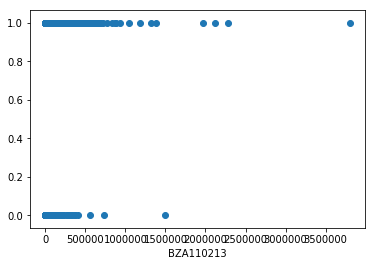

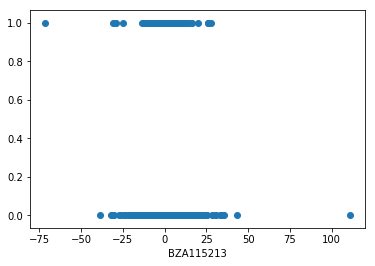

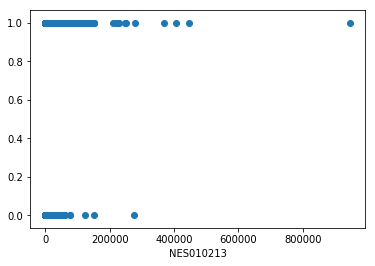

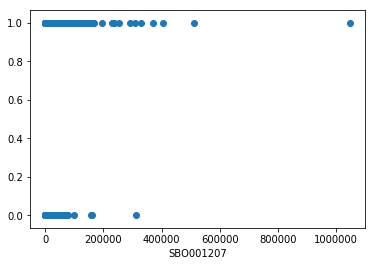

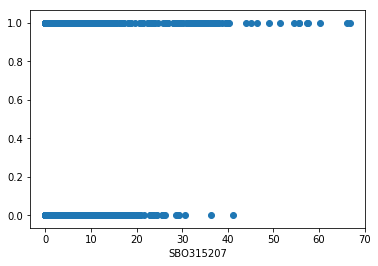

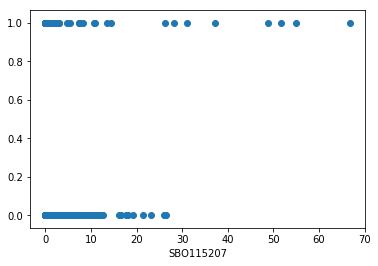

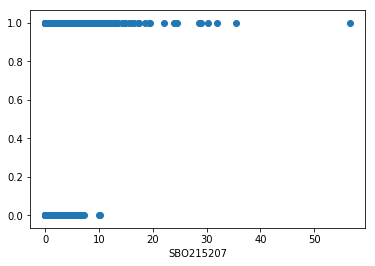

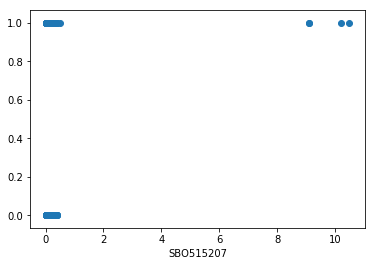

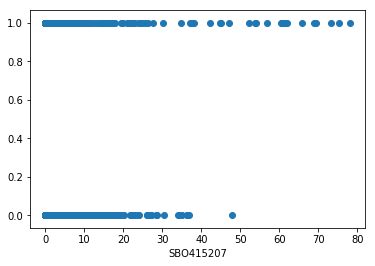

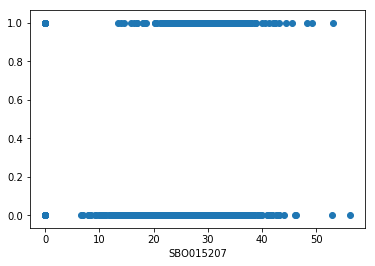

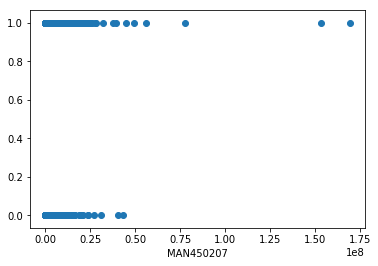

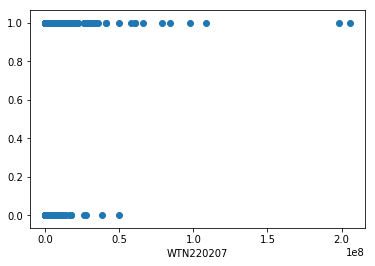

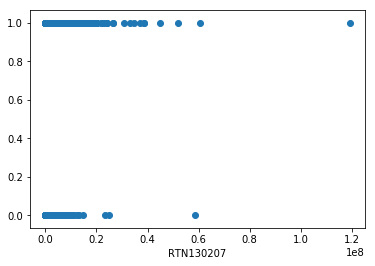

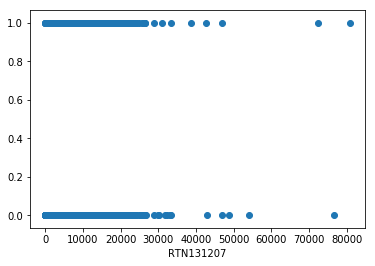

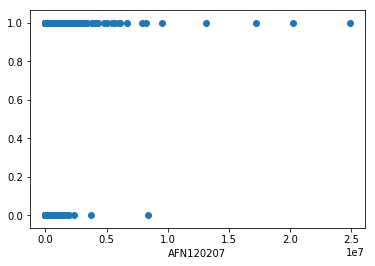

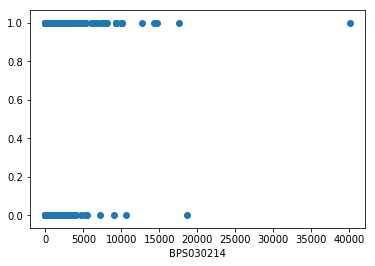

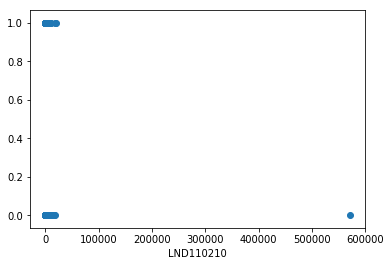

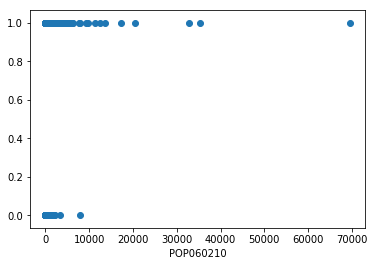

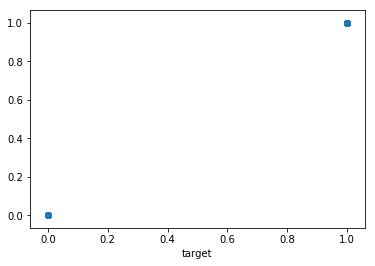

In [37]:
import matplotlib.pyplot as plt
for column in columns:
    plt.scatter(column,'target',data=data)
    plt.xlabel(column)
    plt.show()
    

In [27]:
data.re

target
0    49.837257
1    50.587910
Name: SEX255214, dtype: float64

In [153]:
data_1 = data.drop(columns,axis=1)

In [168]:
data_1[['PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213',
       'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',
       'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207',
       'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210',
       'POP060210', 'target']].corr()['target'].sort_values(ascending=False)

target       1.000000
HSG096213    0.483521
RHI425214    0.413984
EDU685213    0.400891
SBO215207    0.391120
SBO315207    0.390437
POP645213    0.384204
HSG495213    0.383315
RHI225214    0.378653
HSD410213    0.346151
HSG010214    0.346065
VET605213    0.343566
RTN130207    0.342029
BZA110213    0.341471
BZA010213    0.336094
PST040210    0.334592
POP010210    0.334586
PST045214    0.334400
POP815213    0.322915
SBO001207    0.318572
NES010213    0.309117
AFN120207    0.305669
SBO415207    0.285250
BPS030214    0.267844
WTN220207    0.261107
MAN450207    0.256417
SBO015207    0.252782
POP060210    0.220027
RHI725214    0.206902
INC910213    0.176998
RTN131207    0.176738
PVY020213    0.170925
RHI625214    0.161417
HSD310213    0.159303
INC110213    0.135230
RHI525214    0.126538
SEX255214    0.123769
PST120214    0.122315
SBO115207    0.108292
SBO515207    0.099322
AGE135214    0.089720
RHI325214    0.069256
LFE305213    0.045515
BZA115213    0.023233
LND110210   -0.003602
EDU635213 

In [44]:
X1 = data[['HSG096213','RHI825214','RHI125214']]
y1 = data['target']

In [50]:
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
kfold = KFold(n_splits=5,shuffle=True,random_state=1)
log = LogisticRegression(C=1,max_iter=1000)
def f_1score(X,y):
    precision = []
    recall = []
    f1 = []
    for train_index, test_index in kfold.split(X):
        trainX, testX = X.iloc[train_index],X.iloc[test_index]
        trainY, testY = y.iloc[train_index],y.iloc[test_index]
    
        log.fit(trainX,trainY)
        y_pred = log.predict(testX)
        
        precision.append(precision_score(y_pred,testY))
        recall.append(recall_score(y_pred,testY))
        f1.append(f1_score(y_pred,testY))
    
    return precision,recall,f1

In [34]:
result = pd.DataFrame(columns=[['Precision','recall','f1']])

,HSG096213,RHI825214,RHI125214
0,8.3,75.6,77.9
1,24.4,83.0,87.1
2,10.6,46.6,50.2
3,7.3,74.5,76.3
4,4.5,87.8,96.0
5,8.7,22.1,26.9
6,13.3,53.1,53.9
7,13.8,72.9,75.8
8,11.1,56.8,58.3
9,4.6,91.6,93.0


In [35]:
y1

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      1
32      1
33      0
34      0
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      1
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      0
52      1
53      0
54      0
55      0
56      1
57      0
58      0
59      1
60      0
61      0
62      0
63      0
64      0
65      1
66      0
67      0
68      1
69      0
70      1
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      0
80      1
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
